# Vulcano

In [1]:
import pandas as pd
data = {
    'cells': {},
    'tissue': {}
}
data['cells']['neg'] = pd.read_excel(
    '../raw/statistical_results_KO_vs_WT_dissociatedcells_lipidomics_negmode.xlsx',
    index_col=0
)
data['cells']['pos'] = pd.read_excel(
    '../raw/statistical_results_KO_vs_WT_dissociatedcells_lipidomics_posmode.xlsx',
    index_col=0
)
data['tissue']['neg'] = pd.read_excel(
    '../raw/statistical_results_KO_vs_WT_wholetissue_negmode_new_normalizedTIC_outlierremoved.xlsx',
    index_col=0
)
data['tissue']['pos'] = pd.read_excel(
    '../raw/statistical_results_KO_vs_WT_wholetissue_posmode_new_normalizedTIC_outlierremoved.xlsx',
    index_col=0
)
data

{'cells': {'neg':         ID  RT [min]        m/z            Identification  Adduct type  \
  272  14361     9.804  887.56567      PI 38:3|PI 18:0_20:3       [M-H]-   
  274  14317     8.860  885.55054      PI 38:4|PI 18:1_20:3       [M-H]-   
  179  10133    10.415  714.50848      PE 34:2|PE 18:0_16:2       [M-H]-   
  172   9552     9.270  686.47601      PE 32:2|PE 16:0_16:2       [M-H]-   
  269  13639     8.758  859.53540      PI 36:3|PI 16:0_20:3       [M-H]-   
  ..     ...       ...        ...                       ...          ...   
  55    2651     5.164  329.24841                   FA 22:5       [M-H]-   
  73    7659     3.546  587.40656          IS: LPC 18:1(d7)  [M+CH3COO]-   
  167  13425     9.727  850.59619  PC O-38:6|PC O-16:0_22:6  [M+CH3COO]-   
  74    7658     3.266  587.40625          IS: LPC 18:1(d7)       [M-H]-   
  50    2196     4.840  303.23273                   FA 20:4       [M-H]-   
  
       Statistical Value  p-value  adjusted p-value (BH)  \
  272    

In [2]:
import numpy as np
cells_pos = pd.read_csv(
    '../raw/lipidomics_rawdata_dissociated_cells_posmode.txt',
    sep = '\t',
    skiprows = 4
)
cells_neg = pd.read_csv(
    '../raw/lipidomics_rawdata_dissociated_cells_negmode.txt',
    sep = '\t',
    skiprows = 4
)
cells_pos['KOstd'] = np.log2(cells_pos[['Cell_KO_1A', 'Cell_KO_1B', 'Cell_KO_2A', 'Cell_KO_3B', 'Cell_KO_4A']]).std(axis = 1)
cells_pos['WTstd'] = np.log2(cells_pos[['Cell_WT_1A', 'Cell_WT_1B', 'Cell_WT_2A', 'Cell_WT_3B', 'Cell_WT_4A']]).std(axis = 1)
cells_neg['KOstd'] = np.log2(cells_neg[['Cell_KO_1A', 'Cell_KO_1B', 'Cell_KO_2A', 'Cell_KO_3B', 'Cell_KO_4A']]).std(axis = 1)
cells_neg['WTstd'] = np.log2(cells_neg[['Cell_WT_1A', 'Cell_WT_1B', 'Cell_WT_2A', 'Cell_WT_3B', 'Cell_WT_4A']]).std(axis = 1)
filter_names = cells_pos[(cells_pos[['KOstd', 'WTstd']] > 1).any(axis = 1) | cells_pos[['KOstd', 'WTstd']].isna().any(axis = 1)]['Metabolite name'].to_list()
filter_names.extend(
    cells_neg[(cells_neg[['KOstd', 'WTstd']] > 1).any(axis = 1) | cells_neg[['KOstd', 'WTstd']].isna().any(axis = 1)]['Metabolite name'].to_list()
)
filter_names

/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


['CE 22:4',
 'CE 22:6',
 'CE 24:4',
 'DG 34:2',
 'DG 34:2|DG 16:0_18:2',
 'DG 36:3|DG 18:1_18:2',
 'DG 36:4',
 'DG 36:5|DG 18:2_18:3',
 'DGCC 36:2',
 'DGDG 34:2|DGDG 16:0_18:2',
 'DGDG 36:3|DGDG 18:1_18:2',
 'DGDG 36:4|DGDG 18:2_18:2',
 'HexCer 34:0;4O|HexCer 18:0;3O/16:0;(2OH)',
 'LPC 18:3/0:0',
 'MGDG 36:4|MGDG 18:2_18:2',
 'TG 24:0|TG 8:0_8:0_8:0',
 'TG 28:0|TG 8:0_10:0_10:0',
 'TG 32:0|TG 8:0_8:0_16:0',
 'TG 34:0|TG 8:0_10:0_16:0',
 'TG 36:0|TG 10:0_10:0_16:0',
 'TG 42:2|TG 8:0_16:0_18:2',
 'TG 44:2|TG 12:0_14:0_18:2',
 'TG 44:3|TG 8:0_18:1_18:2',
 'TG 50:2;1O|TG 16:0_18:2_16:0;1O',
 'TG 51:3|TG 15:0_18:1_18:2',
 'TG 52:3|TG 16:0_18:1_18:2',
 'TG 52:3|TG 16:0_18:1_18:2',
 'TG 52:4;1O|TG 16:0_18:2_18:2;1O',
 'TG 52:4|TG 16:0_18:1_18:3',
 'TG 52:4|TG 16:0_18:2_18:2',
 'TG 52:5;1O|TG 18:2_18:2_16:1;1O',
 'TG 53:2|TG 17:0_17:1_19:1',
 'TG 53:3|TG 17:0_18:1_18:2',
 'TG 53:4|TG 17:1_18:1_18:2',
 'TG 54:2|TG 16:0_18:1_20:1',
 'TG 54:2|TG 18:0_18:1_18:1',
 'TG 54:3;1O|TG 18:1_18:1_18:1;1O'

In [3]:
for k1, d1 in data.items():
    for k2, df in d1.items():
        df['mode'] = k2

cells = pd.concat(data['cells'].values())
tissue = pd.concat(data['tissue'].values())
for df in [cells, tissue]:
    df['group'] = df.Identification.apply(
        lambda x: x.split()[0]
    )

In [4]:
import numpy as np
def make_hue(x, pvalcol, pvalcut, lfccut):
    if not x[pvalcol] <= pvalcut or not abs(x['log2FC']) >= lfccut:
        return 'n.s._' + x['mode']
    
    elif not x['group'] in ['PI', 'PE', 'PC', 'PS', 'CL', 'TG']:
        return 'other'
    
    else:
        return x['group'] + '_' + x['mode']
        
for df in [cells, tissue]:
    df['log2FC'] = np.log2(df['fold change KO  vs  WT'])
    df['lipid_group'] = df[['group', 'mode', 'p-value', 'log2FC']].apply(
        make_hue,
        pvalcol = 'p-value',
        pvalcut = 0.05,
        lfccut = 0.25,
        axis = 1
    )
    df['-log10(adj. p-value)'] = -np.log10(df['adjusted p-value (BH)'])
    df['-log10(p-value)'] = -np.log10(df['p-value'])

/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
tissue['lipid_group'].unique()

array(['PS_neg', 'other', 'PC_neg', 'PI_neg', 'n.s._neg', 'CL_neg',
       'PE_neg', 'n.s._pos', 'PS_pos', 'TG_pos', 'PC_pos', 'PE_pos',
       'CL_pos', 'PI_pos'], dtype=object)

/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
/Users/dmalzl/miniconda3/envs/mathcode/lib/python3.9/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


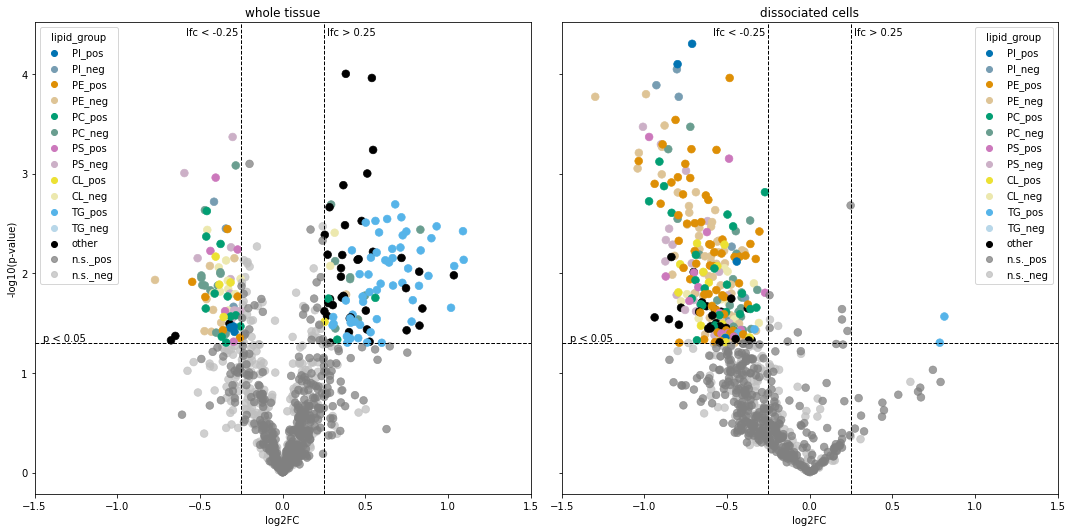

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools as it
from matplotlib import colors
mpl.rcParams['pdf.fonttype'] = 42

def desaturate(c):
    hsv = colors.rgb_to_hsv(c)
    hsv[1] = hsv[1] / 3
    return colors.hsv_to_rgb(hsv)

groups = ['PI', 'PE', 'PC', 'PS', 'CL', 'TG']
cmap = sns.color_palette('colorblind', 10)
palette = {}
for i, group in zip([0, 1, 2, 4, 8, 9], groups):
    c = cmap[i]
    palette[group + '_pos'] = c
    palette[group + '_neg'] = desaturate(c)

palette['other'] = 'k'
palette['n.s._pos'] = (0.5, 0.5, 0.5, 0.75)
palette['n.s._neg'] = (0.75, 0.75, 0.75, 0.75)

fig, axs = plt.subplots(1, 2, sharey = True)
for label, df, ax in zip(
    ['whole tissue', 'dissociated cells'],
    [tissue, cells],
    axs
):
    # df = df[np.abs(df['log2FC']) < 1.5]
    df = df[~df.Identification.isin(filter_names)]
    sns.scatterplot(
        data = df,
        x = 'log2FC',
        y = '-log10(p-value)',
        hue = 'lipid_group',
        hue_order = palette.keys(),
        palette = palette,
        ax = ax,
        edgecolor = None,
        s = 60
    )
    ax.set_title(label)
    for x in [-0.25, 0.25]:
        ax.axvline(
            x,
            ls = '--',
            lw = 1,
            c = 'k'
        )
    
    ax.axhline(
        -np.log10(0.05),
        ls = '--',
        lw = 1,
        c = 'k'
    )
    ax.set_xlim(-1.5, 1.5)
    ax.text(
        -1.45,
        -np.log10(0.05),
        'p < 0.05',
        va = 'bottom',
        ha = 'left'
    )

for ax in axs:
    ax.text(
        -0.27,
        ax.get_ylim()[1] - 0.05,
        'lfc < -0.25',
        va = 'top',
        ha = 'right'
    )
    ax.text(
        0.27,
        ax.get_ylim()[1] - 0.05,
        'lfc > 0.25',
        va = 'top',
        ha = 'left'
    )
        

fig.set_figheight(7.5)
fig.set_figwidth(15)
fig.tight_layout()
fig.savefig('../plots/lipidomics_pval.pdf')